# Shubham Sharma
# DATA SCIENCE & BUSINESS ANALYTICS INTERN AT THE SPARKS FOUNDATION
# Dataset: (https://bit.ly/3kXTdox)
# TASK -6   Prediction using Decision Tree Algorithm 
Hey everyone! This is a Supervised Learning(Classification) project in which when we feed any new data to this classifier, 
it would be able to predict the right class accordingly.
For this i have used the well knowed Iris dataset.

This video will guide you through the process of retrieving answers to all these questions.

Let us get started!

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
from sklearn.datasets import load_iris
df=load_iris()
df.DESCR.split('\n')

['.. _iris_dataset:',
 '',
 'Iris plants dataset',
 '--------------------',
 '',
 '**Data Set Characteristics:**',
 '',
 '    :Number of Instances: 150 (50 in each of three classes)',
 '    :Number of Attributes: 4 numeric, predictive attributes and the class',
 '    :Attribute Information:',
 '        - sepal length in cm',
 '        - sepal width in cm',
 '        - petal length in cm',
 '        - petal width in cm',
 '        - class:',
 '                - Iris-Setosa',
 '                - Iris-Versicolour',
 '                - Iris-Virginica',
 '                ',
 '    :Summary Statistics:',
 '',
 '    ============== ==== ==== ======= ===== ====================',
 '                    Min  Max   Mean    SD   Class Correlation',
 '    ============== ==== ==== ======= ===== ====================',
 '    sepal length:   4.3  7.9   5.84   0.83    0.7826',
 '    sepal width:    2.0  4.4   3.05   0.43   -0.4194',
 '    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)',
 '    pe

In [3]:
print(df.feature_names)
print(df.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
data = pd.DataFrame(df.data, columns=df.feature_names)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
data['target'] = df.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
print(data.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [8]:
data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

In [9]:
# Missing value 
print(data.isna().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


Since the sum of each cells of each features is zero then we can conclude that there is no missing data.

# Checking Class Imbalancing

In [10]:
data['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

Since our outcomes are equally divided so we can say that there is no class imbalance nature and our model will learn equally for each species.

# Splitting the dataset 

In [11]:
features=data.drop('target',axis=1)

In [12]:
target=data[['target']]

In [13]:
X_train , X_test, y_train, y_test = train_test_split(features, target, random_state = 21,test_size=0.20)

In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120, 1)
(30, 4)
(30, 1)


# Defining Decision Tree Algorithm

In [15]:
model=DecisionTreeClassifier(max_depth = 3,random_state = 21)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=21)

In [16]:
my_preds = model.predict(X_test)
my_preds

array([1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1,
       2, 1, 0, 1, 0, 0, 1, 2])

In [17]:
accuracy_score(y_test, my_preds)

0.9333333333333333

In [18]:
accuracy_score(y_train, model.predict(X_train))

0.9916666666666667

Now we can see that while training the data my accuracy is 99 % and while prediction on test data its accuracy is 93% so we can say that model is not performing  well on test data.

In [19]:
print(confusion_matrix(y_test, my_preds))

[[11  0  0]
 [ 0 10  2]
 [ 0  0  7]]


In [20]:
print(classification_report(y_test, my_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



# Visualizing Decision Trees using Matplotlib

### Using Plot tree

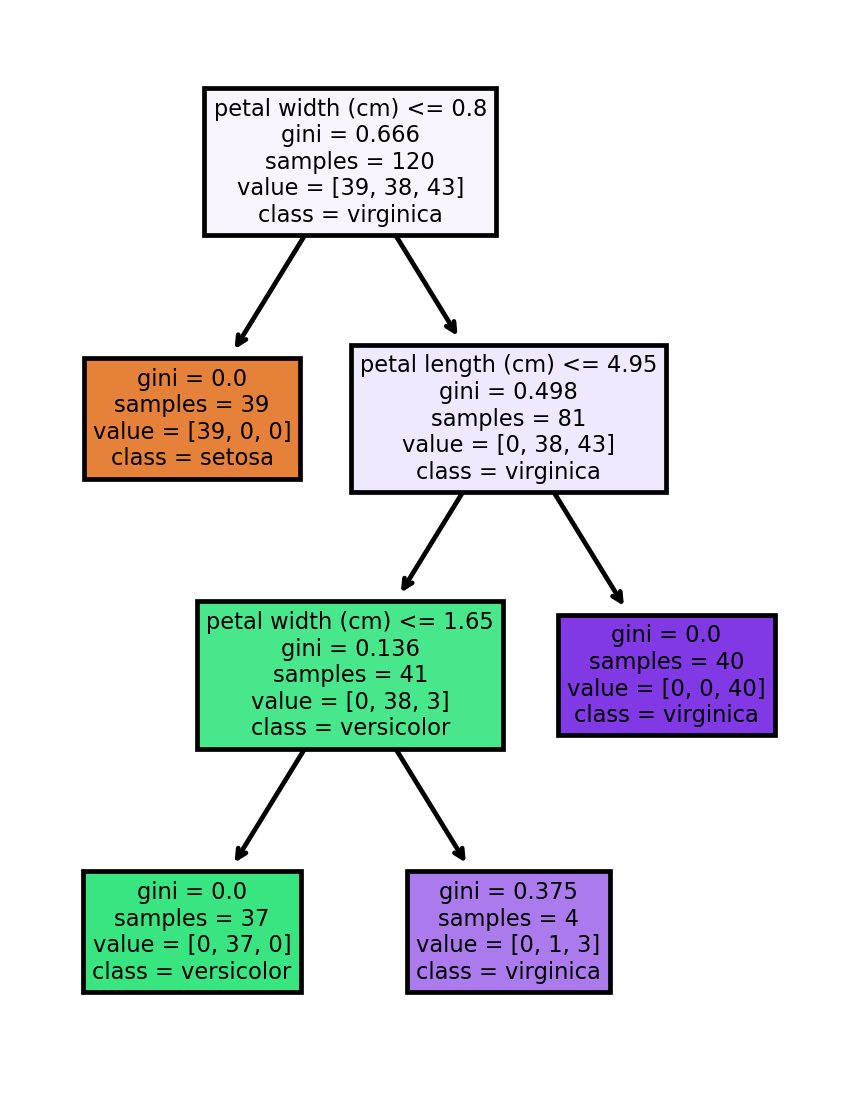

In [21]:
feature_name=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
class_name=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,4), dpi=340)
tree.plot_tree(model,
               feature_names = feature_name, 
               class_names=class_name,
               filled = True);
fig.savefig('imagename.png')

                                                 Thank-You